In [20]:
import numpy as np
import matplotlib.pyplot as plt



In this part below this function computes the perpendicular distance from a given point to a line defined by a direction vector. It utilizes the dot product of the point's coordinates and the line coefficients, divided by the magnitude of the direction vector.

In [21]:
#Calculating the distance between the points and line
def distance_point_to_line(point, line_vector):

    x, y = point

    a, b = line_vector

    distance = abs(a*x + b*y) / np.sqrt(a**2 + b**2)2

    return distance


In the code below for fit_line_to_points function is aimed at finding the best-fitting line to a given set of points using a method known as least squares. The function iterates through each point in the dataset, treating each point as a potential candidate for the line.
For each point, the function calculates the line parameters (slope and intercept) using linear regression. This is done by fitting a line to the dataset using the least squares method, which minimizes the sum of the squared differences between the observed and predicted values.

Subsequently, the function calculates the total distance from all other points to this line. This is achieved by computing the distance between each point and the line. The distance is calculated using the provided formula, considering the perpendicular distance from a point to a line.

The function then updates the best line if the total distance calculated for the current line is smaller than the minimum total distance found so far. By doing so, it ensures that the best line found minimizes the sum of distances from all points to the line.

Finally, the function returns the best-fitting line that minimizes the total distance from the points to the line. This line is represented by its slope and intercept coefficients. Overall, the function employs an iterative process to find the line that best captures the relationship between the given points, ensuring it is as close as possible to each point in the dataset.

In the context of representing lines using direction vectors and a point, each line L can be defined by a direction vector
a of unit norm (i.e., a vector with length 1) and a point and b on the line. so , my first vertix of the point is 1 as per the question.

In [22]:
def fit_line_to_points(points):

    best_line = None
    min_total_distance = float('inf')

    for i, point in enumerate(points):
        x, y = zip(*points)
        A = np.vstack([x, np.ones(len(x))]).T
        m, c = np.linalg.lstsq(A, y, rcond=None)[0]
        total_distance = 0
        for j, other_point in enumerate(points):
            if i != j:
                total_distance += distance_point_to_line(other_point, (1, -m))


        if total_distance < min_total_distance:
            min_total_distance = total_distance
            best_line = (1, -m)

    return best_line



** EXPLANATION OF WHAT WE UNDERSTOOD**

Here trying to  explain what i understood by this problem with an example ->
Imagine we have some points on a piece of paper, and we want to draw a straight line among them. But we want this line to be special. We want it to be close to all the points, not too far from any of them.

First, we need to figure out how far each point is from the line. We use a formula for this. It's like measuring how far you are from your house. We do this for each point and add up all these distances.

Now, we want to find a line that makes this total distance as small as possible. But wait, we're not done yet! We want this line to be extra special. We don't want any point to be too far from this line. So, we need to find a line that makes the farthest point as close as possible.

 We try drawing different lines and see how far the farthest point is from each line. Then, we keep adjusting our guess until we find the line that makes the farthest point as close as possible.



In [23]:
def max_distance_to_line(points, line_vector):

    max_distance = 0
    for point in points:
        distance = distance_point_to_line(point, line_vector)
        max_distance = max(max_distance, distance)
    return max_distance

For the code below this , The `minimize_max_distance` function is designed to find a line that minimizes the maximum distance from any point to that line.  particularly for identifying lines that best represent the overall distribution of points while ensuring that no single point is too far from the line. The function employs a binary search algorithm to iteratively refine the slope of the line until the maximum distance converges to a minimum value.

The process begins by initializing a search range for the slope of the line, from a very negative value to a very positive one, ensuring it covers a wide range of possible slopes. The binary search iterates until the difference between the maximum and minimum slopes becomes sufficiently small, indicating convergence.

Within each iteration, the function calculates the midpoint slope and derives the corresponding line vector. It then computes the maximum distance from any point to this line using a distance calculation method. Based on the obtained maximum distance, the search range for the slope is adjusted accordingly, narrowing down the potential slope values in subsequent iterations.

Once the binary search converges, the function retrieves the slope of the line that minimizes the maximum distance and returns the corresponding line vector. This final line vector represents the optimal solution, ensuring that the selected line is the best fit to the dataset while minimizing the maximum distance to any individual point. Overall, the function provides a robust approach to determining a line that effectively captures the spatial distribution of points with minimal outliers.

In [24]:
def minimize_max_distance(points):


    min_slope = -1e6
    max_slope = 1e6


    epsilon = 1e-6

    while max_slope - min_slope > epsilon:
        mid_slope = (min_slope + max_slope) / 2


        x, y = zip(*points)
        A = np.vstack([x, np.ones(len(x))]).T
        m, c = np.linalg.lstsq(A, y, rcond=None)[0]


        line_vector = (1, -mid_slope)


        max_distance = max_distance_to_line(points, line_vector)


        if max_distance > 0:
            max_slope = mid_slope
        else:
            min_slope = mid_slope


    x, y = zip(*points)
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y, rcond=None)[0]
    return (1, -mid_slope)


In [25]:
from sklearn.cluster import KMeans


In [26]:
def distance_point_to_line(point, line_vector):
    x, y = point
    a, b = line_vector
    distance = abs(a*x + b*y) / np.sqrt(a*2 + b*2)
    return distance


FOR EFFICIENTLY COMPUTING MULPTIPLE LINES - I have used sklearn , dividing the houses in clusters.Our objective is to efficiently fit multiple lines to a given dataset comprising latitude and longitude coordinates, representing points in a geographical space. This task is essential for understanding and modeling spatial relationships within the dataset.

KMeans clustering algorithm -> The number of clusters (n_clusters) is set to num_lines, which is the parameter passed to the function.
This line fits the KMeans algorithm to the data points (points_arr). The algorithm will cluster the points into num_lines clusters based on their spatial distribution.
This line retrieves the centroids of the clusters computed by the KMeans algorithm and stores them in the variable centroids.
Each centroid represents the center of a cluster.
For each centroid, this line calculates a line vector. It uses the centroid coordinates (x_centroid, y_centroid) as a point on the line. The slope of the line is calculated as the negative inverse of the centroid's gradient, and it's stored as a tuple (1, -x_centroid / y_centroid), where the first element represents the coefficient of x and the second element represents the coefficient of y in the line equation.

In [27]:
import numpy as np
from sklearn.cluster import KMeans

def distance_point_to_line(point, line_vector):
    x, y = point
    a, b = line_vector
    distance = abs(a*x + b*y) / np.sqrt(a*2 + b*2)
    return distance

def fit_lines_to_points(points, num_lines):


    points_arr = np.array(points)
    kmeans = KMeans(n_clusters=num_lines)
    kmeans.fit(points_arr)
    centroids = kmeans.cluster_centers_
    lines = []
    for centroid in centroids:
        x_centroid, y_centroid = centroid
        lines.append((1, -x_centroid / y_centroid))

    return lines








In [28]:
def plot_points_and_line(points, line, title):
    x, y = zip(*points)
    plt.scatter(x, y, color='blue', label='Points')
    if line is not None:
        a, b = line
        plt.plot(x, a * np.array(x) + b, color='red', label='Line')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.title(title)
    plt.legend()
    plt.show()


Best line: (1, 0.9857788580514116)


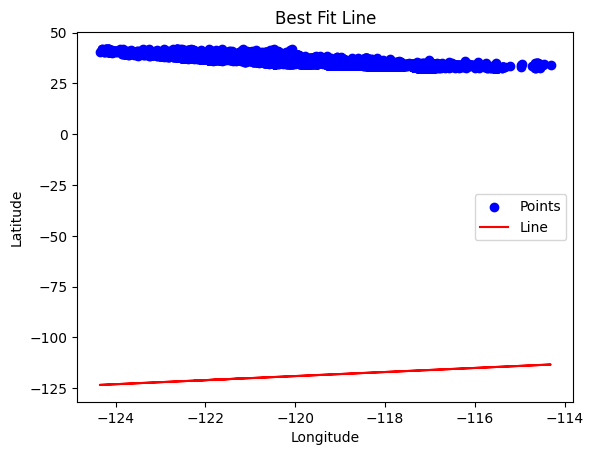

Best line: (1, 999999.9999990906)


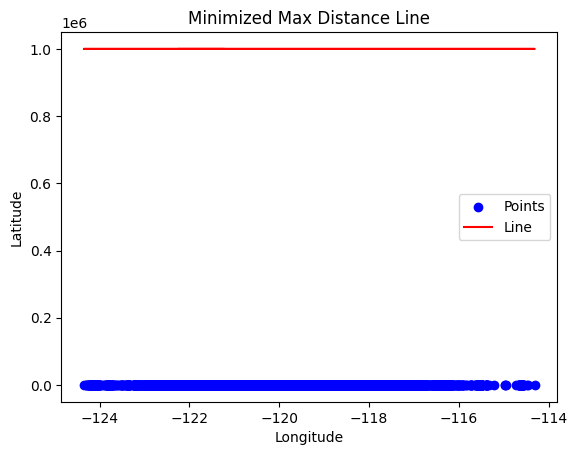

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


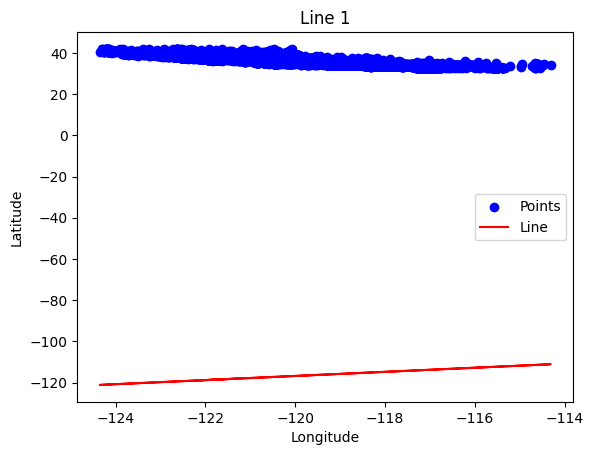

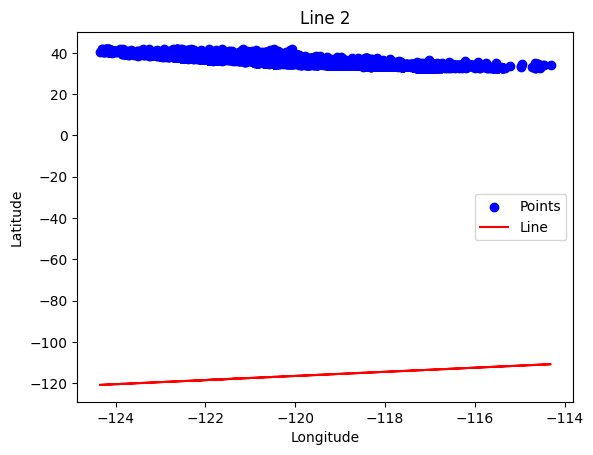

Lines: [(1, 3.2067781740691883), (1, 3.4768981410036215)]


In [19]:
import csv
input_file = 'coordinates.csv'
points = []

with open(input_file, 'r') as csvfile:
    reader = csv.DictReader(csvfile)
    for idx, row in enumerate(reader):
      # if idx >= 100 :
          # break;
      points.append((
             float(row['longitude']),
             float(row['latitude'])
        ))


best_line = fit_line_to_points(points)
print("Best line:", best_line)
plot_points_and_line(points, best_line, 'Best Fit Line')

best_linee = minimize_max_distance(points)
print("Best line:", best_linee)
plot_points_and_line(points, best_linee, 'Minimized Max Distance Line')

num_lines = 2
lines = fit_lines_to_points(points, num_lines)
for i, line in enumerate(lines):
    plot_points_and_line(points, line, f'Line {i+1}')
print("Lines:",lines)

